In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# User-based recommendations

In [20]:
# the file is in a Box folder 
ratings = pd.read_csv('ratings_large.csv')
ratings

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)
...,...,...,...,...,...
10395149,283224,1388,2.0,851001995,Jaws 2 (1978)
10395150,283224,1394,3.0,851002354,Raising Arizona (1987)
10395151,283224,1396,3.0,851002354,Sneakers (1992)
10395152,283224,2019,5.0,851000812,Seven Samurai (Shichinin no samurai) (1954)


In [21]:
# (transpose) ratings matrix
ratings_matrix = ratings.pivot('title','userId')['rating']
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,3.0,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# select a userId 
user = 4
user_ratings = ratings_matrix.loc[:,user]
user_ratings

title
(500) Days of Summer (2009)                               NaN
10 Things I Hate About You (1999)                         NaN
101 Dalmatians (1996)                                     NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)    NaN
12 Angry Men (1957)                                       1.5
                                                         ... 
Zoolander (2001)                                          NaN
Zootopia (2016)                                           NaN
eXistenZ (1999)                                           3.5
xXx (2002)                                                3.5
¡Three Amigos! (1986)                                     3.0
Name: 4, Length: 1344, dtype: float64

In [23]:
# drop user column from the ratings matrix
ratings_matrix.drop(user,axis=1,inplace=True)

In [24]:
# movies rated by the user
user_ratings[user_ratings.notna()].index.to_list()

['12 Angry Men (1957)',
 '13 Going on 30 (2004)',
 '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
 '2001: A Space Odyssey (1968)',
 '25th Hour (2002)',
 '28 Weeks Later (2007)',
 '300 (2007)',
 'AVP: Alien vs. Predator (2004)',
 'About Schmidt (2002)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Addams Family Values (1993)',
 'Adventures in Babysitting (1987)',
 'Air Force One (1997)',
 'Airplane II: The Sequel (1982)',
 'Airplane! (1980)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Alien (1979)',
 'Alien: Resurrection (1997)',
 'Aliens (1986)',
 'Alien³ (a.k.a. Alien 3) (1992)',
 'American Beauty (1999)',
 'American Gangster (2007)',
 'American Pie (1999)',
 'American Pie 2 (2001)',
 'American President, The (1995)',
 'Analyze This (1999)',
 'Anchorman: The Legend of Ron Burgundy (2004)',
 'Antz (1998)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Armageddon (1998)',
 'Army of Darkness (1993)',
 'As Good as It Gets 

In [25]:
# movies not rated by the user
user_ratings[user_ratings.isna()].index.to_list()

['(500) Days of Summer (2009)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '13th Warrior, The (1999)',
 '20,000 Leagues Under the Sea (1954)',
 '2012 (2009)',
 '21 Grams (2003)',
 '21 Jump Street (2012)',
 '28 Days (2000)',
 '28 Days Later (2002)',
 '3:10 to Yuma (2007)',
 '40-Year-Old Virgin, The (2005)',
 '50 First Dates (2004)',
 '6th Day, The (2000)',
 '8 Mile (2002)',
 'A.I. Artificial Intelligence (2001)',
 'About a Boy (2002)',
 'Adaptation (2002)',
 'Addams Family, The (1991)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)',
 'Airheads (1994)',
 'Alice in Wonderland (1951)',
 'Alice in Wonderland (2010)',
 'All About Eve (1950)',
 'All About My Mother (Todo sobre mi madre) (1999)',
 "All the President's Men (1976)",
 'Almost Famous (2000)',
 'Amadeus (1984)',
 'Amazing Spider-Man, The (2012)',
 "Amelie (Fabu

In [26]:
# ratings distribution
user_ratings.value_counts(dropna=False)

NaN    812
4.0    126
3.5     97
4.5     90
5.0     60
3.0     46
2.5     34
2.0     34
0.5     27
1.0      9
1.5      9
Name: 4, dtype: int64

In [27]:
# user top movies
user_ratings.sort_values(ascending=False).head(20)

title
Shrek (2001)                                                     5.0
Batman Begins (2005)                                             5.0
Incredibles, The (2004)                                          5.0
Rock, The (1996)                                                 5.0
Insomnia (2002)                                                  5.0
Spider-Man (2002)                                                5.0
Spider-Man 2 (2004)                                              5.0
Road to Perdition (2002)                                         5.0
Spy Game (2001)                                                  5.0
Clear and Present Danger (1994)                                  5.0
Traffic (2000)                                                   5.0
Pulp Fiction (1994)                                              5.0
Kung Fu Hustle (Gong fu) (2004)                                  5.0
L.A. Confidential (1997)                                         5.0
Last Samurai, The (2003)    

In [28]:
# user bottom movies
user_ratings.sort_values().head(20)

title
Napoleon Dynamite (2004)                  0.5
Showgirls (1995)                          0.5
Spy Kids (2001)                           0.5
Royal Tenenbaums, The (2001)              0.5
Beavis and Butt-Head Do America (1996)    0.5
Super Mario Bros. (1993)                  0.5
Big Lebowski, The (1998)                  0.5
Titanic (1997)                            0.5
Bio-Dome (1996)                           0.5
Blair Witch Project, The (1999)           0.5
Blues Brothers, The (1980)                0.5
Sleepless in Seattle (1993)               0.5
Miss Congeniality (2000)                  0.5
Breakfast Club, The (1985)                0.5
Bridget Jones's Diary (2001)              0.5
Moulin Rouge (2001)                       0.5
Cable Guy, The (1996)                     0.5
Dude, Where's My Car? (2000)              0.5
Dumb & Dumber (Dumb and Dumber) (1994)    0.5
Eyes Wide Shut (1999)                     0.5
Name: 4, dtype: float64

In [29]:
# user mean rating
user_mean = user_ratings.mean()
user_mean

3.5253759398496243

In [30]:
# user standard deviation rating
user_std = user_ratings.std()
user_std

1.1591017244209465

## The z-scores matrix

In [31]:
# matrix of z-scores (scale-free ratings)
z_scores = (ratings_matrix - ratings_matrix.mean())/ratings_matrix.std()
z_scores

userId,19,42,43,51,55,56,71,73,79,81,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,0.441226,NaN,NaN,NaN,NaN,-1.447012,0.883303,NaN,-0.337638,...,NaN,NaN,NaN,-0.552253,NaN,0.258297,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,-1.913005,NaN,NaN,NaN,-0.311645,-0.337638,...,0.197451,NaN,1.846808,NaN,NaN,NaN,NaN,-1.542636,NaN,NaN
101 Dalmatians (1996),NaN,0.441226,NaN,NaN,NaN,-2.040622,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,-0.111992,-1.576142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.538664,0.772019,NaN,NaN
12 Angry Men (1957),1.905267,NaN,0.523548,1.245453,NaN,1.210739,NaN,NaN,NaN,1.501957,...,NaN,NaN,0.006166,NaN,NaN,NaN,NaN,NaN,NaN,1.290966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,-0.182702,NaN,-1.694737,NaN,-0.337638,...,0.197451,NaN,NaN,NaN,NaN,-1.559117,NaN,-0.385309,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similarities

In [14]:
# user similarity function = correlation 
similarities = ratings_matrix.corrwith(user_ratings)
similarities

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


userId
19        0.159140
42        0.210912
43        0.076897
51        0.054488
55        0.111830
            ...   
283184    0.273766
283185   -0.236463
283195    0.259962
283204    0.529978
283224    0.290326
Length: 35288, dtype: float64

## Prediction function

In [15]:
# select number of neighbors
k = 20

# select an (unrated) item: 'Dawn of the Dead (2004)', "Zoolander (2001)", 'Duck Soup (1933)'
item = 'Duck Soup (1933)'

In [16]:
# k nearest neighbors similarities
knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)
knn_sim

userId
12965     0.587681
217072    0.569474
22356     0.561807
212286    0.547833
7447      0.546593
142811    0.540547
194288    0.524176
99528     0.506119
108159    0.490787
55154     0.483149
179274    0.482920
9167      0.481198
145434    0.479428
125191    0.478997
157627    0.476314
258252    0.475452
272189    0.474592
132687    0.474003
55363     0.473490
80551     0.473297
dtype: float64

In [17]:
# normalization factor
total = knn_sim.abs().sum()
total

10.127856811704268

In [18]:
# k nearest neighbors
knn = knn_sim.index
knn

Int64Index([ 12965, 217072,  22356, 212286,   7447, 142811, 194288,  99528,
            108159,  55154, 179274,   9167, 145434, 125191, 157627, 258252,
            272189, 132687,  55363,  80551],
           dtype='int64', name='userId')

In [19]:
knn_z_scores = z_scores.loc[item,knn]
knn_z_scores

userId
12965    -1.234474
217072   -0.258047
22356     1.214986
212286   -0.137899
7447      0.523436
142811   -0.282218
194288    0.225861
99528     0.637257
108159    1.107292
55154     0.564398
179274    0.655949
9167      1.586778
145434    0.591159
125191    0.750338
157627    1.176458
258252    0.649668
272189    0.992902
132687    1.550637
55363     0.663083
80551     1.578402
Name: Duck Soup (1933), dtype: float64

In [20]:
# prediction
prediction = user_mean + user_std*knn_z_scores.dot(knn_sim)/total
print(item+': '+str(np.round(prediction,1)))

Duck Soup (1933): 4.2


In [21]:
# the same in one cell:

# select number of neighbors
k = 20

# select item
item = "Zoolander (2001)"# 

# k nearest neighbors similarities
knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)
    
# normalization factor
total = knn_sim.abs().sum()

# k nearest neighbors
knn = knn_sim.index

# k nearest neighbors z-scores
knn_z_scores = z_scores.loc[item,knn]

# prediction
prediction = user_mean + user_std*knn_sim.dot(knn_z_scores)/total

print(item+': '+str(np.round(prediction,1)))

Zoolander (2001): 2.7


## Fake user

In [22]:
# fake user likes sci-fi films, action-adventures films, and doesn't like romance films, kid movies
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
user = pd.read_csv(url,index_col='title', squeeze=True)
user

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [23]:
user_mean = user.mean()
user_std = user.std()

In [24]:
# user similarities
similarities = ratings_matrix.corrwith(user)

In [25]:
# not rated movies
not_rated_movies = user[user.isna()].index.to_list()
not_rated_movies

['(500) Days of Summer (2009)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '12 Angry Men (1957)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '13 Going on 30 (2004)',
 '13th Warrior, The (1999)',
 '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
 '20,000 Leagues Under the Sea (1954)',
 '21 Grams (2003)',
 '21 Jump Street (2012)',
 '25th Hour (2002)',
 '28 Days (2000)',
 '28 Weeks Later (2007)',
 '40-Year-Old Virgin, The (2005)',
 '6th Day, The (2000)',
 '8 Mile (2002)',
 'About Schmidt (2002)',
 'About a Boy (2002)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adaptation (2002)',
 'Addams Family Values (1993)',
 'Addams Family, The (1991)',
 'Adventures in Babysitting (1987)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)',
 'Airheads (1994)',
 'Airplane II: The Sequel (1982)',
 'Airplane! (1980)',
 'Alice in Won

In [26]:
k = 20
for item in not_rated_movies:
    # k nearest neighbors similarities
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()
    
    # k nearest neighbors
    knn = knn_sim.index
    
    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn]
    

    # prediction
    prediction = user_mean + user_std*knn_sim.dot(knn_z_scores)/total
    user.loc[item] = prediction

In [27]:
# top 20 recommendations
user.loc[not_rated_movies].sort_values(ascending=False).head(20)

title
Lord of the Rings: The Return of the King, The (2003)                        4.388813
Great Escape, The (1963)                                                     4.369330
Usual Suspects, The (1995)                                                   4.348822
Once Upon a Time in the West (C'era una volta il West) (1968)                4.330175
Snatch (2000)                                                                4.286529
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)               4.265878
Crow, The (1994)                                                             4.215325
Full Metal Jacket (1987)                                                     4.207860
Departed, The (2006)                                                         4.202965
Star Wars: Episode V - The Empire Strikes Back (1980)                        4.138309
Predator (1987)                                                              4.090445
Boondock Saints, The (2000)                     

In [28]:
# bottom 20 recommendations
user.loc[not_rated_movies].sort_values(ascending=False).tail(20)

title
Evita (1996)                                              0.803839
Barb Wire (1996)                                          0.799725
Emperor's New Groove, The (2000)                          0.777676
Sleeping Beauty (1959)                                    0.765450
28 Days (2000)                                            0.741817
Snow White and the Seven Dwarfs (1937)                    0.727969
Legally Blonde (2001)                                     0.710884
Lady and the Tramp (1955)                                 0.710223
Casper (1995)                                             0.683327
Babe (1995)                                               0.682220
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.666383
What Women Want (2000)                                    0.660166
Honey, I Blew Up the Kid (1992)                           0.631303
Beauty and the Beast (1991)                               0.563107
Richie Rich (1994)                                      

## The impact of the long tail

In [32]:
# fake user likes sci-fi films, action-adventures films, and doesn't like romance films, kid movies
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
user = pd.read_csv(url,index_col='title', squeeze=True)
user

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [33]:
# number of ratings each movie received
n_ratings = ratings.groupby('title')['rating'].count()
n_ratings

title
(500) Days of Summer (2009)                               6030
10 Things I Hate About You (1999)                         8385
101 Dalmatians (1996)                                     5327
101 Dalmatians (One Hundred and One Dalmatians) (1961)    6326
12 Angry Men (1957)                                       9469
                                                          ... 
Zoolander (2001)                                          8618
Zootopia (2016)                                           4031
eXistenZ (1999)                                           4437
xXx (2002)                                                5112
¡Three Amigos! (1986)                                     5166
Name: rating, Length: 1344, dtype: int64

Text(0, 0.5, 'number of movies')

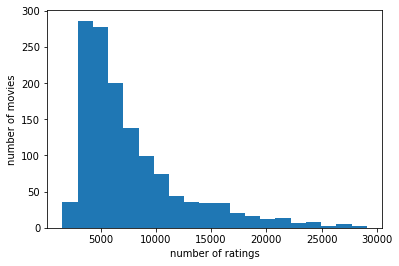

In [34]:
n_ratings.plot.hist(bins=20)
plt.xlabel('number of ratings')
plt.ylabel('number of movies')

In [35]:
# popular movies
n_ratings[n_ratings>20000].sort_values(ascending=False)

title
Forrest Gump (1994)                                                               29095
Matrix, The (1999)                                                                28917
Pulp Fiction (1994)                                                               28128
Star Wars: Episode IV - A New Hope (1977)                                         27398
Silence of the Lambs, The (1991)                                                  26916
Shawshank Redemption, The (1994)                                                  26635
Star Wars: Episode V - The Empire Strikes Back (1980)                             26582
Jurassic Park (1993)                                                              26423
Back to the Future (1985)                                                         26305
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    25597
Star Wars: Episode VI - Return of the Jedi (1983)                                 25334
Toy Story (1995)          

In [36]:
# number of users
n_users = ratings['userId'].nunique()
n_users

35289

In [37]:
# weights
weights = np.log(n_users/n_ratings)
weights

title
(500) Days of Summer (2009)                               1.766824
10 Things I Hate About You (1999)                         1.437127
101 Dalmatians (1996)                                     1.890783
101 Dalmatians (One Hundred and One Dalmatians) (1961)    1.718903
12 Angry Men (1957)                                       1.315548
                                                            ...   
Zoolander (2001)                                          1.409718
Zootopia (2016)                                           2.169557
eXistenZ (1999)                                           2.073593
xXx (2002)                                                1.931981
¡Three Amigos! (1986)                                     1.921473
Name: rating, Length: 1344, dtype: float64

In [38]:
weights['Forrest Gump (1994)']

0.1930049625377807

In [40]:
# pandas does not have a built-in function that computes weighted correlations
def weighted_corrwith(y):
    
    x = user
    
    # means
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # denominator
    den1 = np.sqrt(np.sum((weights*(x-mean_x)**2)))
    den2 = np.sqrt(np.sum((weights*(y-mean_y)**2)))
    den = den1*den2
    
    # numerator
    num = np.sum(weights*(x-mean_x)*(y-mean_y))
    
    return num/den

In [41]:
similarities = ratings_matrix.apply(weighted_corrwith)
similarities

<ipython-input-40-2fa491eef3cd>:18: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


userId
19        0.004222
42        0.025606
43       -0.009501
51       -0.032180
55        0.009073
            ...   
283184   -0.043505
283185   -0.027653
283195   -0.035021
283204    0.003724
283224    0.036143
Length: 35288, dtype: float64

In [42]:
# not rated movies
not_rated_movies = user[user.isna()].index.to_list()
not_rated_movies

['(500) Days of Summer (2009)',
 '10 Things I Hate About You (1999)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '12 Angry Men (1957)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '13 Going on 30 (2004)',
 '13th Warrior, The (1999)',
 '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
 '20,000 Leagues Under the Sea (1954)',
 '21 Grams (2003)',
 '21 Jump Street (2012)',
 '25th Hour (2002)',
 '28 Days (2000)',
 '28 Weeks Later (2007)',
 '40-Year-Old Virgin, The (2005)',
 '6th Day, The (2000)',
 '8 Mile (2002)',
 'About Schmidt (2002)',
 'About a Boy (2002)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adaptation (2002)',
 'Addams Family Values (1993)',
 'Addams Family, The (1991)',
 'Adventures in Babysitting (1987)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)',
 'Airheads (1994)',
 'Airplane II: The Sequel (1982)',
 'Airplane! (1980)',
 'Alice in Won

In [43]:
k = 20
for item in not_rated_movies:
    # k nearest neighbors similarities
    knn_sim = similarities[ratings_matrix.loc[item].notna()].sort_values(ascending=False).head(k)

    # normalization factor
    total = knn_sim.abs().sum()
    
    # k nearest neighbors
    knn = knn_sim.index
    
    # k nearest neighbors z-scores
    knn_z_scores = z_scores.loc[item,knn]
    

    # prediction
    prediction = user_mean + user_std*knn_sim.dot(knn_z_scores)/total
    user.loc[item] = prediction

In [44]:
# top 20 recommendations
user.loc[not_rated_movies].sort_values(ascending=False).head(20)

title
Departed, The (2006)                                              4.682956
Usual Suspects, The (1995)                                        4.682422
Lock, Stock & Two Smoking Barrels (1998)                          4.559158
Deadpool (2016)                                                   4.544108
Donnie Darko (2001)                                               4.542166
Once Upon a Time in the West (C'era una volta il West) (1968)     4.533546
Heat (1995)                                                       4.491051
Full Metal Jacket (1987)                                          4.487550
American History X (1998)                                         4.484172
Monty Python and the Holy Grail (1975)                            4.481047
Taxi Driver (1976)                                                4.470894
Army of Darkness (1993)                                           4.469444
Thing, The (1982)                                                 4.451244
Evil Dead II (Dead 

## Appendix: create a fake user

In [ ]:
fake_user = pd.DataFrame(index=ratings_matrix.index,columns=['rating'])
fake_user

In [ ]:
fake_user.to_csv('fake_kid_user.csv')